# OFDM Channel Estimation with Least Squares (LS) method

## Simple Memoryless Model:
r[n] = h[n]s[n]+w[n]

* s[n] = Tx QAM symbol
* r[n] = Rx QAM symbols.
* h[n] = fading channel gain
* w[n] = noise

assuming perfect synchronization and no ISI (inferference).


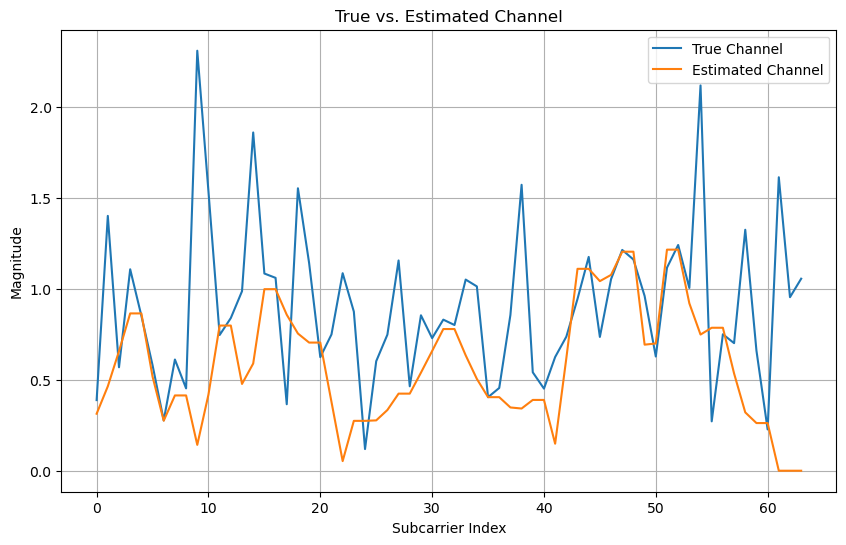

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_subcarriers = 64
num_symbols = 10
pilot_indices = np.arange(0, num_subcarriers, 4)  # Every 4th subcarrier is a pilot
num_pilots = len(pilot_indices)
snr_db = 20
snr_linear = 10**(snr_db / 10)

# Transmitted signal
tx_signal = np.random.randn(num_subcarriers, num_symbols) + 1j * np.random.randn(num_subcarriers, num_symbols)
tx_pilots = tx_signal[pilot_indices, :]

# Channel (assuming a flat fading channel for simplicity)
channel = (np.random.randn(num_subcarriers) + 1j * np.random.randn(num_subcarriers)) / np.sqrt(2)

# Received signal with noise
noise_variance = 1 / snr_linear
noise = np.sqrt(noise_variance / 2) * (np.random.randn(num_subcarriers, num_symbols) + 1j * np.random.randn(num_subcarriers, num_symbols))
rx_signal = tx_signal * channel[:, np.newaxis] + noise
rx_pilots = rx_signal[pilot_indices, :]

# Channel estimation using Least Squares (LS) method
estimated_channel = np.zeros((num_subcarriers, num_symbols), dtype=complex)
estimated_channel[pilot_indices, :] = rx_pilots / tx_pilots

# Interpolation of channel estimates (linear interpolation)
for i in range(1, len(pilot_indices)):
    start_idx = pilot_indices[i-1]
    end_idx = pilot_indices[i]
    for j in range(num_symbols):
        if start_idx != end_idx:  # Avoid division by zero error
            estimated_channel[start_idx:end_idx, j] = np.linspace(
                estimated_channel[start_idx, j], estimated_channel[end_idx, j], end_idx - start_idx
            )

# Plot true and estimated channel for the first symbol
plt.figure(figsize=(10, 6))
plt.plot(np.abs(channel), label='True Channel')
plt.plot(np.abs(estimated_channel[:, 0]), label='Estimated Channel')
plt.xlabel('Subcarrier Index')
plt.ylabel('Magnitude')
plt.title('True vs. Estimated Channel')
plt.legend()
plt.grid(True)
plt.show()


## Summary of the Plot:
* True Channel (Blue Line): Actual magnitude of the channel across all subcarriers (= 64)
* Estimated Channel: estimated magnitude of the channel using the Least Squares method with linear interpolation between pilot subcarriers. The estimatation tries to approximate the true channel as close as possible based on the noisy received signal and pilot information.

## and Channel estimate helps
1. Improve the signal quality
2. Enhance data rates by adjusting the transmission parameters (ex: modulation order and coding rate)
3. Enable MIMO systems by seperating multiple transmitted data streams over the same frequency band.
4. Optimize power control, frequency allocation, and scheduling.
5. Support advanced techniques like beamforming, interference cancellation, and spatial diversity.


